In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['SimHei']

all_data = pd.read_csv('../datasets/all.csv')
gdp = pd.read_csv('../datasets/city.csv')

In [13]:
price = all_data.groupby('city')[['price', 'area']].apply(lambda x: pd.Series({
    'mean': (x['price'] / x['area']).mean()
})).reset_index()

data = pd.merge(gdp, price, on='city')
print(data)

  city        gdp   income        mean
0   北京  190125.65  6451.25   96.015706
1   上海  179369.57  6634.17   99.787047
2   广州  153312.49  5946.50   53.682015
3   深圳  183171.66  6059.83  101.831855
4  驻马店   47058.08  1987.50   14.965140


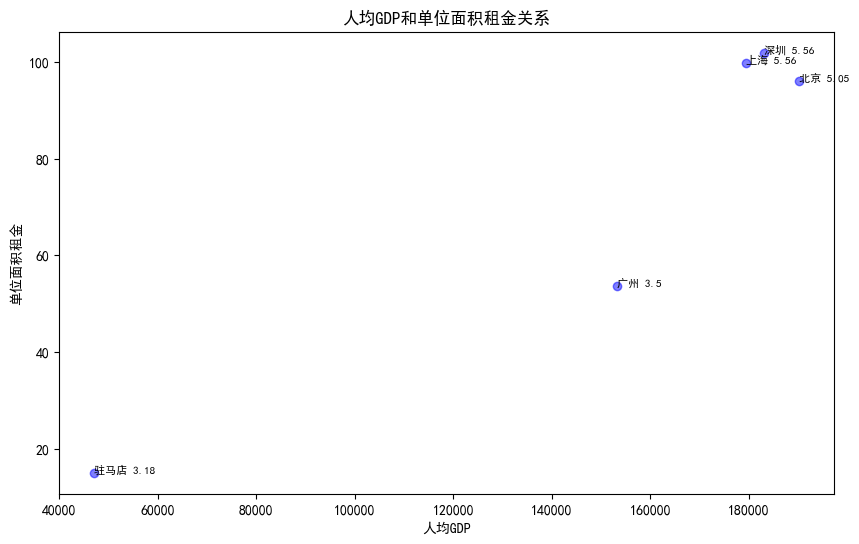

In [22]:
cities = data['city']
gdp = data['gdp']
unit_rent = data['mean']


plt.figure(figsize=(10, 6))
plt.scatter(gdp, unit_rent, c='blue', alpha=0.5)

plt.title('人均GDP和单位面积租金关系')
plt.xlabel('人均GDP')
plt.ylabel('单位面积租金')

for i in range(len(cities)):
    plt.annotate(cities[i] + ' ' + str(round(unit_rent[i] * 1e4 / gdp[i], 2)), (gdp[i], unit_rent[i]), fontsize=8)

plt.savefig('imgs/人均GDP和单位面积租金关系')